In [17]:
import warnings

# Ignore UserWarning for QDA
warnings.simplefilter("ignore", UserWarning)

import os

dir = str(os.getcwd())
split_dir = dir.split('\\')

# Set the github repository directory
for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print('Current directory:', os.getcwd())

Current directory: c:\Users\AndreLopes\Desktop\git\AA_Project_G6


In [18]:
import pandas as pd
import numpy as np

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='./data/processed/data_processed.csv', delimiter=',')

In [19]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import VarianceThreshold

# Create the input and output matrices, split in training and testing subsets
y = df.copy()['Attrition_Flag_Existing Customer']
X = df.copy().drop(columns=['Attrition_Flag_Existing Customer'])

##feature selection
X = X.drop(columns=['Avg_Open_To_Buy'])
X = X.drop(columns=['Total_Trans_Ct'])
#sel = VarianceThreshold(threshold=0.05) ##Does´t improve results
#X = sel.fit_transform(X)

##Generate test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##Feature selection - Forward Selection
from sklearn.feature_selection import SequentialFeatureSelector

log_reg = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(log_reg, n_features_to_select=4, direction='forward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = log_reg.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)

print("Linear Regression Model using foward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


##No feature selection

## Create the Logistic Regression model and fit the data to it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

## Predict the classification and print the confusion matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"Linear Regression Model without feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

## Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(log_reg.classes_)) if log_reg.classes_[i] == 'Up']
y_logistic_pred = log_reg.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 'Up').copy()

Linear Regression Model using foward feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  165 | 43
Predicted Existing:  291 | 2540

Success Rate: 89.01%
Error Rate: 10.99%


Linear Regression Model without feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  167 | 79
Predicted Existing:  289 | 2504

Success Rate: 87.89%
Error Rate: 12.11%


In [21]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

##Feature selection - Backward Selection
from sklearn.feature_selection import SequentialFeatureSelector

LDA = LinearDiscriminantAnalysis()
sfs = SequentialFeatureSelector(LDA, n_features_to_select=4, direction='backward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = LDA.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)

print("Linear Discriminant Analysis Model using backward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


##No feature selection

# Create the Linear Discriminand Analysis model and fit the data to it
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = LDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"Linear Discriminant Analysis Model without feature selection")
print ('\n' + 'Actual'.rjust(28))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(LDA.classes_)) if LDA.classes_[i] == 1]
y_LDA_pred = LDA.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()

Linear Discriminant Analysis Model using backward feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  157 | 41
Predicted Existing:  299 | 2542

Success Rate: 88.81%
Error Rate: 11.19%


Linear Discriminant Analysis Model without feature selection

                      Actual
                Churned  |  Existing
 Predicted Churned:  191 | 85
Predicted Existing:  265 | 2498

Success Rate: 88.48%
Error Rate: 11.52%


In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

##Feature selection - backward Selection
from sklearn.feature_selection import SequentialFeatureSelector

QDA = QuadraticDiscriminantAnalysis()
sfs = SequentialFeatureSelector(QDA, n_features_to_select=4, direction='backward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = QDA.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)

print("Quadratic Discriminant Analysis Model using backward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))



# Create the model and fit the data to it
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = QDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"Quadratic Discriminant Analysis Model without feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(QDA.classes_)) if QDA.classes_[i] == 1]
y_QDA_pred = QDA.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()

In [23]:
from sklearn.naive_bayes import GaussianNB


##Feature selection - backward Selection
from sklearn.feature_selection import SequentialFeatureSelector

GNB = GaussianNB()
sfs = SequentialFeatureSelector(GNB, n_features_to_select=4, direction='backward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
GNB = GaussianNB()
GNB.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = GNB.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)

print("GaussianNB Model using backward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))



# Create the Gaussian Naive Bayes model and fit the data to it
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = GNB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"GaussianNB Model without feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print success rate
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(GNB.classes_)) if GNB.classes_[i] == 1]
y_GNB_pred = GNB.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()

GaussianNB Model using backward feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  170 | 63
Predicted Existing:  286 | 2520

Success Rate: 88.52%
Error Rate: 11.48%


GaussianNB Model without feature selection

                       Actual
                Churned  |  Existing
 Predicted Churned:  195 | 119
Predicted Existing:  261 | 2464

Success Rate: 87.50%
Error Rate: 12.50%


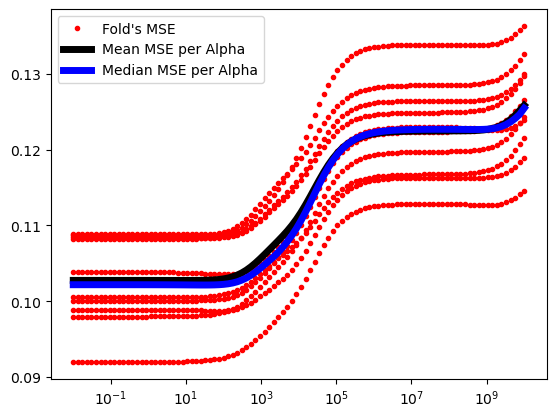

In [24]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# K-Fold Cross Validation
random_seed = 10
kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)

X_ridge = X.values
y_ridge = y.values

values_ridge = pd.DataFrame(columns=['alpha', 'mse'])
alphas = [10**i for i in np.linspace(start = -2, stop = 10, num = 100).tolist()]
count = 0
iter_count = 1

for alpha in alphas:

    for train, test in kf.split(X_ridge):

        X_train = X_ridge[train]
        X_test = X_ridge[test]
        y_train = y_ridge[train]
        y_test = y_ridge[test]
        
        clf = Ridge(alpha=alpha)
        clf.fit(X_train, y_train)


        y_pred = clf.predict(X_test)
        mse = metrics.mean_squared_error(y_pred,y_test)

        values_ridge.loc[count] = [alpha, mse]
        count += 1
        


values_ridge2 = values_ridge.copy()
values_ridge2 = values_ridge2.groupby("alpha").mean().reset_index()

values_ridge3 = values_ridge.copy()
values_ridge3 = values_ridge3.groupby("alpha").median().reset_index()

plt.plot(values_ridge.alpha, values_ridge.mse, 'r.', label = 'Fold\'s MSE')
plt.plot(values_ridge2.alpha, values_ridge2.mse, 'k', linewidth=5.0, label = 'Mean MSE per Alpha')
plt.plot(values_ridge3.alpha, values_ridge3.mse, 'b', linewidth=5.0, label = 'Median MSE per Alpha')
plt.xscale('log')
plt.legend()
plt.show()



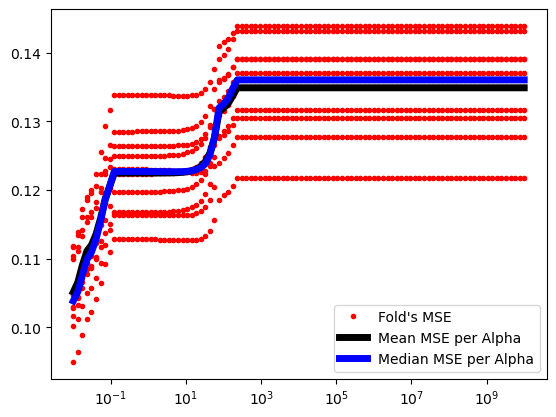


                       Actual
                Churned  |  Existing
 Predicted Churned:  0 | 0
Predicted Existing:  175 | 837

Success Rate: 82.71%
Error Rate: 17.29%


In [25]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# K-Fold Cross Validation
random_seed = 10
kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)

X_ridge = X.values
y_ridge = y.values

values_ridge = pd.DataFrame(columns=['alpha', 'mse'])
alphas = [10**i for i in np.linspace(start = -2, stop = 10, num = 100).tolist()]
count = 0
iter_count = 1

for alpha in alphas:

    for train, test in kf.split(X_ridge):
        
        X_train = X_ridge[train]
        X_test = X_ridge[test]
        y_train = y_ridge[train]
        y_test = y_ridge[test]

        clf = Lasso(alpha=alpha, max_iter = 20000)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        mse = metrics.mean_squared_error(y_pred,y_test)

        values_ridge.loc[count] = [alpha, mse]
        count += 1
        


values_ridge2 = values_ridge.copy()
values_ridge2 = values_ridge2.groupby("alpha").mean().reset_index()

values_ridge3 = values_ridge.copy()
values_ridge3 = values_ridge3.groupby("alpha").median().reset_index()


plt.plot(values_ridge.alpha, values_ridge.mse, 'r.', label = 'Fold\'s MSE')
plt.plot(values_ridge2.alpha, values_ridge2.mse, 'k', linewidth=5.0, label = 'Mean MSE per Alpha')
plt.plot(values_ridge3.alpha, values_ridge3.mse, 'b', linewidth=5.0, label = 'Median MSE per Alpha')
plt.xscale('log')
plt.legend()
plt.show()

##Confusion matrix
encoder = OneHotEncoder()
y_pred = encoder.fit_transform(y_pred.reshape(-1,1)).toarray()
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print success rate
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))